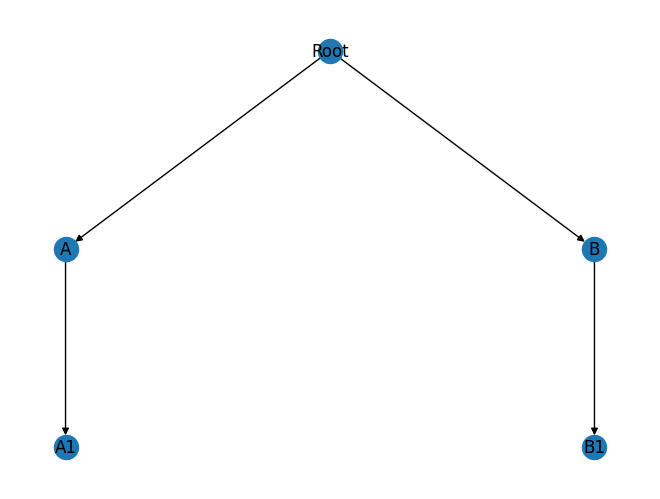

In [6]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph (tree)
G = nx.DiGraph()
edges = [("Root", "A"), ("Root", "B"), ("A", "A1"), ("B", "B1")]
G.add_edges_from(edges)

# Draw the tree
pos = nx.nx_agraph.graphviz_layout(G, prog="dot")  # hierarchical layout
nx.draw(G, pos, with_labels=True, arrows=True)
plt.show()

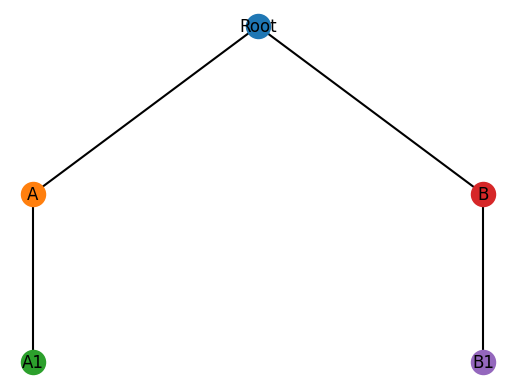

In [1]:
# You can place this in a cell in your notebook

import matplotlib.pyplot as plt

def plot_tree(edges):
    # Build adjacency and parent maps
    from collections import defaultdict
    children = defaultdict(list)
    parents = {}
    nodes = set()
    for parent, child in edges:
        children[parent].append(child)
        parents[child] = parent
        nodes.add(parent)
        nodes.add(child)
    # Find root (node with no parent)
    root = (nodes - set(parents.keys())).pop()
    
    # Recursively assign positions
    def assign_pos(node, x=0, y=0, dx=1):
        pos[node] = (x, y)
        n = len(children[node])
        if n == 0:
            return 1
        width = 0
        child_x = x - dx * (n - 1) / 2
        for child in children[node]:
            w = assign_pos(child, child_x, y - 1, dx / n if n > 1 else dx)
            child_x += w * dx
            width += w
        return width

    pos = {}
    assign_pos(root)
    
    # Draw edges
    for parent, child in edges:
        x0, y0 = pos[parent]
        x1, y1 = pos[child]
        plt.plot([x0, x1], [y0, y1], 'k-', zorder=1)
    # Draw nodes
    for node, (x, y) in pos.items():
        plt.scatter(x, y, s=300, zorder=2)
        plt.text(x, y, node, ha='center', va='center', zorder=3, fontsize=12)
    plt.axis('off')
    plt.show()

# Example usage:
edges = [("Root", "A"), ("Root", "B"), ("A", "A1"), ("B", "B1")]
plot_tree(edges)

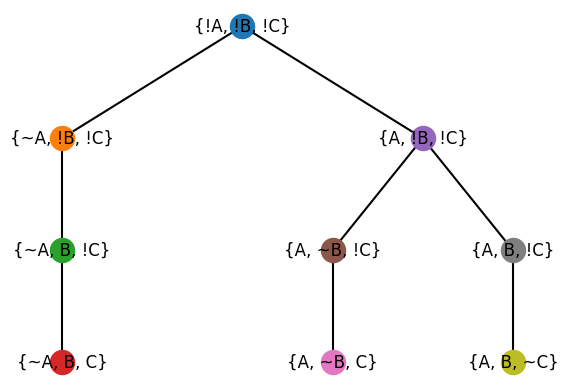

In [2]:
from sympy import symbols
from py_algos_eseidinger.complexity.varianttree import (
    VariantNode,
    Variant,
    Attribute,
    Condition,
    Part,
)

A, B, C = symbols("A, B, C")  # pylint: disable=invalid-name
symbol_order = [[A], [B], [C]]
root_variant = VariantNode.create_root_variant(symbol_order)

variant_1 = Variant([Attribute(A, True), Attribute(B, True), Attribute(C, False)])
variant_2 = Variant([Attribute(A, True), Attribute(B, False), Attribute(C, True)])
variant_3 = Variant([Attribute(A, False), Attribute(B, True), Attribute(C, True)])
possible_variants = [variant_1, variant_2, variant_3]

part_1 = Part("Part 1", Condition(B & (A | C)))
part_2 = Part("Part 2", Condition(C & (A | B)))
all_conditionals = [part_1, part_2]

tree = VariantNode(
    [], root_variant, symbol_order, possible_variants, all_conditionals
)

edge_list = tree.to_edge_list()
# Plot the tree using the custom plot_tree function
plot_tree(edge_list)